# Slow-roll, Rapid-turn inflation models
This notebook contains plotting code only. See the respective python scripts to
generate the data for the models

In [2]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='JetBrains Mono')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams.update({
  "text.usetex": True,
  "text.latex.preamble": "\\usepackage{mathtools}"
})
plt.ioff()

In [3]:
bad = "fuchsia"

#Special colormap for plotting the consistency condition
cc_cmap = mpl.colormaps['Blues_r']
cc_cmap.set_bad(bad)

#special colormap for plotting slow-roll parameters
sr_cmap = mpl.colormaps['Blues_r']
sr_cmap.set_bad(bad)
sr_cmap.set_over("Orange")

#delta map
delta_cmap = mpl.cm.get_cmap('Reds', 7)
delta_cmap.set_bad(bad)

/tmp/ipykernel_45917/41201038.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  delta_cmap = mpl.cm.get_cmap('Reds', 7)


## Angular Inflation

In [3]:
#load data
model='angular'

potential = np.load(f"./out/{model}_potential.npy")
consistency_old = np.load(f"./out/{model}_old.npy")

consistency = np.load(f"./out/{model}.npy")
epsilon_V = np.load(f"./out/{model}_epsilon_V.npy")
epsilon_H = np.load(f"./out/{model}_epsilon_H.npy")
eta_H = np.load(f"./out/{model}_eta_H.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")

consistency_ot = np.load(f"./out/{model}_ot.npy")
epsilon_V_ot = np.load(f"./out/{model}_ot_epsilon_V.npy")
epsilon_H_ot = np.load(f"./out/{model}_ot_epsilon_H.npy")
eta_H_ot = np.load(f"./out/{model}_ot_eta_H.npy")
delta_ot = np.load(f"./out/{model}_ot_delta.npy")
omega_ot = np.load(f"./out/{model}_ot_omega.npy")

x, y = np.load("./trajectories/angular_phix.npy"), np.load("./trajectories/angular_phiy.npy")

Nx, Ny = consistency.shape
extent = (-1.05, 1.05, -1.05, 1.05)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

/tmp/ipykernel_525564/3238766833.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


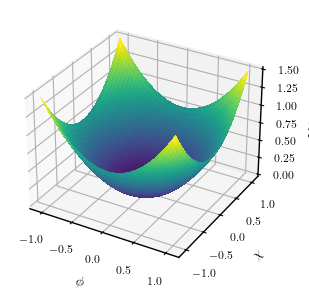

In [5]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
phi = np.linspace(extent[0],extent[1],potential.shape[0])
chi = np.linspace(extent[2],extent[3],potential.shape[1])
surf = ax.plot_surface(*np.meshgrid(phi, chi), potential, cmap='viridis', antialiased=False)
ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')
ax.set_zlabel('$V(\\phi,\\chi)$')

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

/tmp/ipykernel_119706/496244031.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


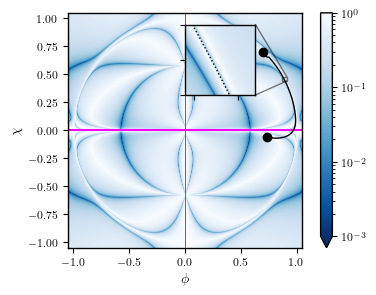

In [4]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=1e-3
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.87, 0.91, 0.44, 0.48  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = cc_cmap,
  aspect = ratio,
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image, extend='min')

#save
fig.show()
fig.savefig(f"./figs/{model}_consistency_exact_log.pdf", dpi=500)

/tmp/ipykernel_525564/592216724.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


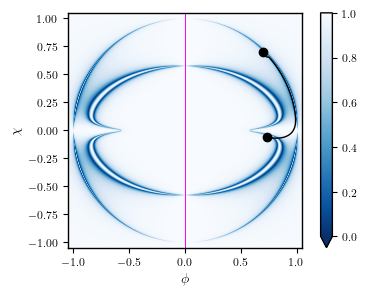

In [7]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency_old),
  extent = extent,
  cmap = cc_cmap,
  #norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image, extend='min')

#save
fig.savefig(f"./figs/{model}_consistency_firstorder_linear.pdf", dpi=500)
fig.show()

/tmp/ipykernel_525564/4218771913.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


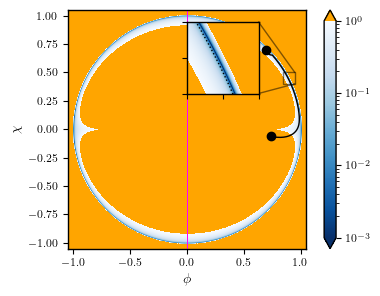

In [8]:
fig, ax = plt.subplots(figsize=(4,3))
image = ax.imshow(
  np.transpose(np.abs(epsilon_H)),
  extent= extent,
  cmap= sr_cmap,
  origin= 'lower',
  aspect= ratio,
  norm='log',
  vmax=1,
  vmin=1e-3
)

ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.85, 0.95, 0.40, 0.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = np.abs(epsilon_H)[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  cmap = sr_cmap,
  aspect = ratio,
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image, extend='both')

#save
fig.show()
fig.savefig(f"./figs/{model}_epsilon_H_log.pdf", dpi=500)

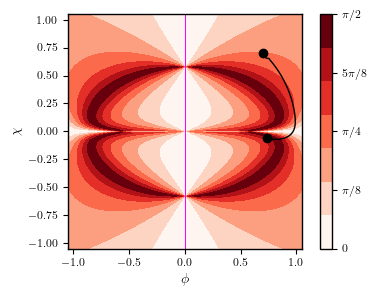

In [9]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(delta),
  extent= extent,
  cmap= delta_cmap,
  origin= 'lower',
  aspect= ratio,
  vmin= 0,
  vmax= np.pi/2
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot, ticks=[np.pi*n/8 for n in np.arange(0, 5)])
cbar.set_ticklabels(['$0$','$\\pi/8$', '$\\pi/4$','$5\\pi/8$','$\\pi/2$'])
plt.xlabel('$\\phi$')
plt.ylabel('$\\chi$')
plt.savefig(f"./figs/{model}_delta.pdf", dpi=500)
plt.show()

/tmp/ipykernel_525564/4029845289.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


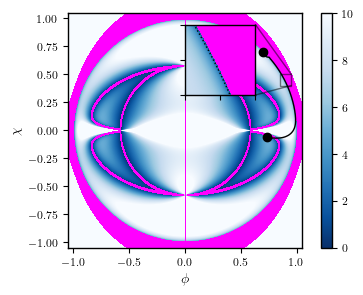

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
plot = ax.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= cc_cmap,
  origin= 'lower',
  aspect= ratio,
  vmax=10,
)

ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.85, 0.95, 0.40, 0.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = omega[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.5, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  origin = 'lower',
  vmax=10
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(plot)

#save
fig.show()
fig.savefig(f"./figs/{model}_omega.pdf", dpi=500)

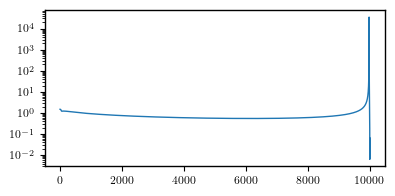

In [11]:
fig = plt.figure(figsize=(4,2))
plt.plot(np.tan(delta_ot)**(-2))
plt.yscale('log')
plt.show()
fig.savefig(f"./figs/{model}_ot_delta.pdf", dpi=500)

## EGNO supergravity

In [12]:
#load data
model = "egno"

potential = np.load(f"./out/{model}_potential.npy")
consistency_old = np.load(f"./out/{model}_old.npy")

consistency = np.load(f"./out/{model}.npy")
epsilon_V = np.load(f"./out/{model}_epsilon_V.npy")
epsilon_H = np.load(f"./out/{model}_epsilon_H.npy")
eta_H = np.load(f"./out/{model}_eta_H.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")

x, y = np.load("./trajectories/egno_r.npy"), np.load("./trajectories/egno_theta.npy")

extent = (0.46, 0.50, 0.0, np.pi)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])
Nx, Ny = consistency.shape

/tmp/ipykernel_525564/1388015561.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


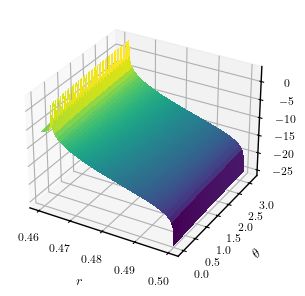

In [13]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
phi = np.linspace(extent[0],extent[1],potential.shape[0])
chi = np.linspace(extent[2],extent[3],potential.shape[1])
potential = np.transpose(np.log10(np.abs(potential)))
surf = ax.plot_surface(*np.meshgrid(phi, chi), potential, cmap='viridis', antialiased=False)
ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_zlabel('$V(r,\\theta)$')

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

/tmp/ipykernel_525564/1043916327.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


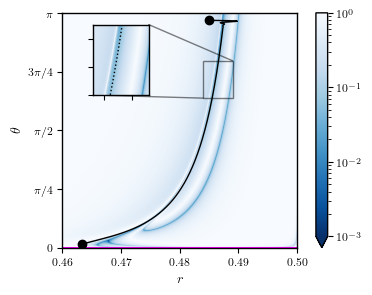

In [14]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=1e-3
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=1e-3
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
fig.colorbar(image, extend='min')

#save
fig.show()
fig.savefig(f"./figs/{model}_consistency_log.pdf", dpi=500)

/tmp/ipykernel_525564/1174537334.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


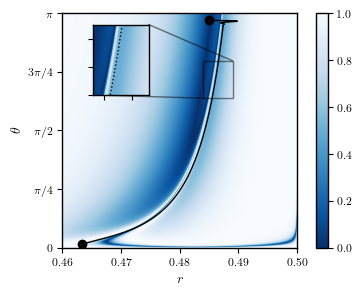

In [15]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency_old),
  extent = extent,
  cmap = cc_cmap,
  # norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency_old[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.65, 0.3, 0.3],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  # norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=0
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_consistency_firstorder_linear.pdf", dpi=500)

/tmp/ipykernel_525564/1544089449.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


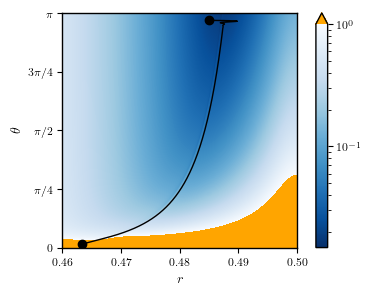

In [16]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(np.abs(epsilon_H)),
  extent = extent,
  cmap = sr_cmap,
  origin = 'lower',
  aspect = ratio,
  norm = "log",
  vmax=1
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# #insert inset zoomed image
# x1, x2, y1, y2 = 0.48, 0.49, 0.8*np.pi, np.pi  # subregion of the original image
# zoom_extent = (x1, x2, y1, y2)
# idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
# idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

# zoom = np.abs(epsilon_H)[idx1:idx2, idy1:idy2]
# zoomax = ax.inset_axes(
#   [0.1, 0.25, 0.4, 0.4],
#   xlim=(x1, x2),
#   ylim=(y1, y2),
#   xticklabels=[],
#   yticklabels=[]
# )
# zoomax.imshow(np.transpose(zoom),
#   extent = zoom_extent,
#   aspect = ratio,
#   cmap = sr_cmap,
#   origin = 'lower',
#   #norm = "log",
#   vmax=1,
#   vmin=0
# )
# zoomax.plot(x, y, color='black', linestyle='dotted')
# zoomax.scatter([x[-1]], [y[-1]], color='black')
# ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
fig.colorbar(image, extend='max')

#save
fig.show()
fig.savefig(f"./figs/{model}_epsilon_H_WITH_trajectory_log.pdf", dpi=500)

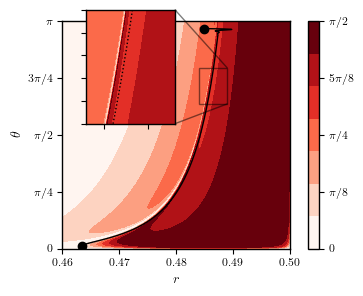

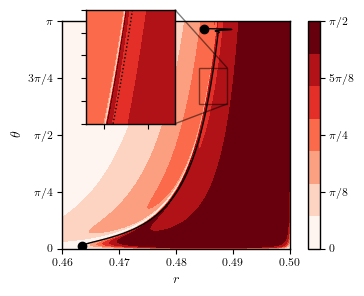

In [17]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(delta),
  extent = extent,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio,
  vmax=np.pi/2,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = delta[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.5, 0.5],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = delta_cmap,
  origin = 'lower',
  vmax=np.pi/2,
  vmin=0
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
cbar = fig.colorbar(image, ticks=[np.pi*n/8 for n in np.arange(0, 5)])
cbar.set_ticklabels(['$0$','$\\pi/8$', '$\\pi/4$','$5\\pi/8$','$\\pi/2$'])

#save
fig.savefig(f"./figs/{model}_delta.pdf", dpi=500)
fig

/tmp/ipykernel_525564/3109353648.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


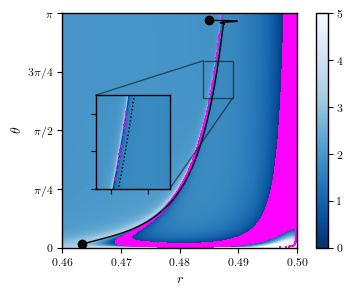

In [18]:
fig, ax = plt.subplots(figsize=(4,3))
image = ax.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= cc_cmap,
  origin= 'lower',
  aspect= ratio,
  vmax=5,
  vmin=0
)

ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = omega[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.1, 0.25, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  origin = 'lower',
  vmax = 5,
  vmin = 0
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi/4, np.pi/2, 0.75*np.pi, np.pi])
ax.set_yticklabels(['0','$\\pi/4$','$\\pi/2$','$3\\pi/4$','$\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_omega.pdf", dpi=500)

## D5-brane models

In [19]:
#load data
model = "d5"

potential = np.load(f"./out/{model}_potential.npy")
consistency_old = np.load(f"./out/{model}_old.npy")

consistency = np.load(f"./out/{model}.npy")
epsilon_V = np.load(f"./out/{model}_epsilon_V.npy")
epsilon_H = np.load(f"./out/{model}_epsilon_H.npy")
eta_H = np.load(f"./out/{model}_eta_H.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")

consistency_ot = np.load(f"./out/{model}_ot.npy")
epsilon_V_ot = np.load(f"./out/{model}_ot_epsilon_V.npy")
epsilon_H_ot = np.load(f"./out/{model}_ot_epsilon_H.npy")
eta_H_ot = np.load(f"./out/{model}_ot_eta_H.npy")
delta_ot = np.load(f"./out/{model}_ot_delta.npy")
omega_ot = np.load(f"./out/{model}_ot_omega.npy")

trajectory = np.loadtxt("./trajectories/d5_trajectory.dat")
x, y = trajectory[:,0], trajectory[:,1]

extent = (0.0, 36.0, 0.0, 4*np.pi)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])
Nx, Ny = consistency.shape

/tmp/ipykernel_525564/112080455.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
/tmp/ipykernel_525564/112080455.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


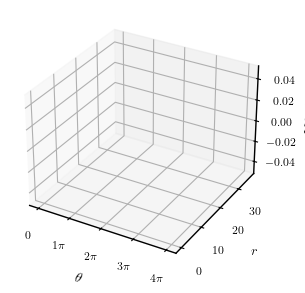

In [20]:
#plot of the potential
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(4,3))
x = np.linspace(extent[2],extent[3],potential.shape[1])
y = np.linspace(extent[0],extent[1],potential.shape[0])
pot = potential#np.log10(np.abs(potential))
surf = ax.plot_surface(*np.meshgrid(x, y), pot, cmap='viridis', antialiased=False)
ax.set_ylabel('$r$')
ax.set_xlabel('$\\theta$')
ax.set_zlabel('$V(r,\\theta)$')
ax.set_xticks(np.pi*np.arange(0, 5), labels=['$0$'] + [f'${n}\\pi$' for n in range(1, 5)])

fig.savefig(f"./figs/{model}_potential.pdf", transparent=True)
fig.tight_layout()
fig.show()

/tmp/ipykernel_525564/4107145270.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


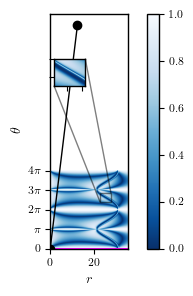

In [21]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency),
  extent = extent,
  cmap = cc_cmap,
  #norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 23, 28, 7.5, 9  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  #norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=0
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_consistency_linear.pdf")

/tmp/ipykernel_525564/1862986624.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


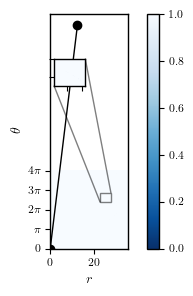

In [22]:
fig, ax = plt.subplots(figsize=(4,3))
#show consistency condition
image = ax.imshow(np.transpose(consistency_old),
  extent = extent,
  cmap = cc_cmap,
  #norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 23, 28, 7.5, 9  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = consistency_old[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  #norm = "log",
  origin = 'lower',
  vmax=1,
  vmin=0
)
zoomax.plot(x, y, color='black', linestyle='dotted')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_consistency_firstorder_linear.pdf")

/tmp/ipykernel_525564/3359240901.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


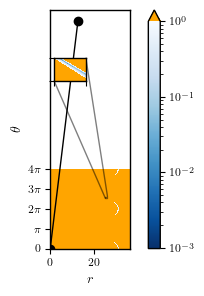

In [23]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(np.abs(epsilon_H)),
  extent = extent,
  cmap = sr_cmap,
  origin = 'lower',
  aspect = ratio,
  norm = "log",
  vmax=1
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.25  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = np.abs(epsilon_H)[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = sr_cmap,
  origin = 'lower',
  norm = "log",
  vmax=1
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
fig.colorbar(image, extend='max')

#save
fig.show()
fig.savefig(f"./figs/{model}_epsilon_H.pdf", dpi=500)

/tmp/ipykernel_525564/1258803794.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


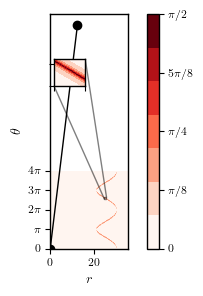

In [24]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(delta),
  extent = extent,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio,
  vmin=0,
  vmax=np.pi/2
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.3  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = delta[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = delta_cmap,
  origin = 'lower',
  vmin=0,
  vmax=np.pi/2
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
cbar = fig.colorbar(image, ticks=[np.pi*n/8 for n in np.arange(0, 5)])
cbar.set_ticklabels(['$0$','$\\pi/8$', '$\\pi/4$','$5\\pi/8$','$\\pi/2$'])

#save
fig.show()
fig.savefig(f"./figs/{model}_delta.pdf", dpi=500)

/tmp/ipykernel_525564/2232518713.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


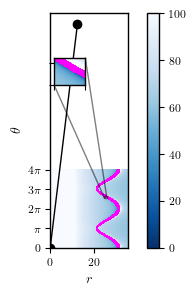

In [25]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(omega),
  extent = extent,
  cmap = cc_cmap,
  origin = 'lower',
  aspect = ratio,
  vmax=100,
  vmin=0
)

#show trajectory
ax.plot(x, y, color='black')
ax.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

# insert inset zoomed image
x1, x2, y1, y2 = 25, 26, 8, 8.3  # subregion of the original image
zoom_extent = (x1, x2, y1, y2)
idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

zoom = omega[idx1:idx2, idy1:idy2]
zoomax = ax.inset_axes(
  [0.05, 0.55, 0.4, 0.4],
  xlim=(x1, x2),
  ylim=(y1, y2),
  xticklabels=[],
  yticklabels=[]
)
zoomax.imshow(np.transpose(zoom),
  extent = zoom_extent,
  aspect = ratio,
  cmap = cc_cmap,
  origin = 'lower',
  vmax=100,
  vmin=0
)
zoomax.plot(x, y, color='black', linestyle='dotted')
zoomax.scatter([x[-1]], [y[-1]], color='black')
ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$r$')
ax.set_ylabel('$\\theta$')
ax.set_yticks([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi])
ax.set_yticklabels(['0','$\\pi$','$2\\pi$','$3\\pi$','$4\\pi$'])

#add a colorbar
cbar = fig.colorbar(image)

#save
fig.show()
fig.savefig(f"./figs/{model}_omega.pdf", dpi=500)

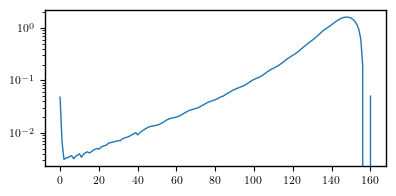

In [26]:
fig = plt.figure(figsize=(4,2))
plt.plot(epsilon_H_ot)
#plt.plot(eta_H_ot)
plt.yscale('log')
plt.show()

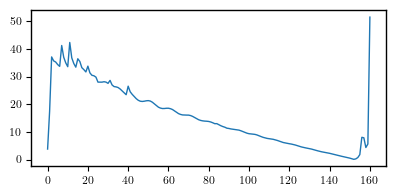

In [27]:
fig = plt.figure(figsize=(4,2))
plt.plot(np.tan(delta_ot))
plt.show()

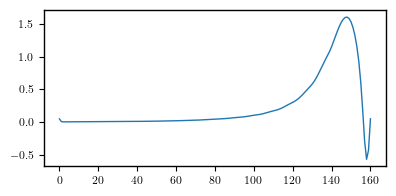

[0.01994092]


In [29]:
fig = plt.figure(figsize=(4,2))
plt.plot(epsilon_H_ot)
plt.show()
print(epsilon_H_ot[60])

In [22]:
#load data
model='hyper'

potential = np.load(f"./out/{model}_potential.npy")
# consistency_old = np.load(f"./out/{model}_old.npy")

consistency = np.load(f"./out/{model}.npy")
epsilon_V = np.load(f"./out/{model}_epsilon_V.npy")
epsilon_H = np.load(f"./out/{model}_epsilon_H.npy")
eta_H = np.load(f"./out/{model}_eta_H.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")

# consistency_ot = np.load(f"./out/{model}_ot.npy")
# epsilon_V_ot = np.load(f"./out/{model}_ot_epsilon_V.npy")
# epsilon_H_ot = np.load(f"./out/{model}_ot_epsilon_H.npy")
# eta_H_ot = np.load(f"./out/{model}_ot_eta_H.npy")
# delta_ot = np.load(f"./out/{model}_ot_delta.npy")
# omega_ot = np.load(f"./out/{model}_ot_omega.npy")

# x, y = np.load("./trajectories/angular_phix.npy"), np.load("./trajectories/angular_phiy.npy")

Nx, Ny = consistency.shape
extent = (0, 80, -0.05, 0.05)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

/tmp/ipykernel_119706/832384044.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


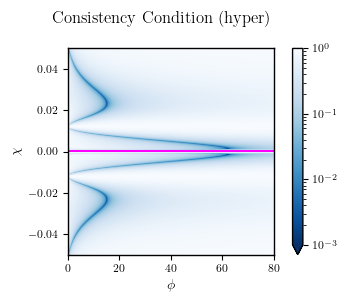

In [33]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=1e-3
)

#show trajectory
# ax.plot(x, y, color='black')
# ax.scatter(
#   [x[0], x[-1]],
#   [y[0], y[-1]],
#   color='black'
# )

# insert inset zoomed image
# x1, x2, y1, y2 = 0.87, 0.91, 0.44, 0.48  # subregion of the original image
# zoom_extent = (x1, x2, y1, y2)
# idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
# idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

# zoom = consistency[idx1:idx2, idy1:idy2]
# zoomax = ax.inset_axes(
#   [0.5, 0.65, 0.3, 0.3],
#   xlim=(x1, x2),
#   ylim=(y1, y2),
#   xticklabels=[],
#   yticklabels=[]
# )
# zoomax.imshow(np.transpose(zoom),
#   extent = zoom_extent,
#   cmap = cc_cmap,
#   aspect = ratio,
#   norm = "log",
#   origin = 'lower',
#   # vmax=1,
#   vmin=1e-3
# )
# zoomax.plot(x, y, color='black', linestyle='dotted')
# ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image, extend='min')

fig.suptitle(f'Consistency Condition ({model})')

#save
fig.show()
fig.savefig(f"./figs/{model}_consistency_exact_log.pdf", dpi=500)

/tmp/ipykernel_119706/3534685616.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


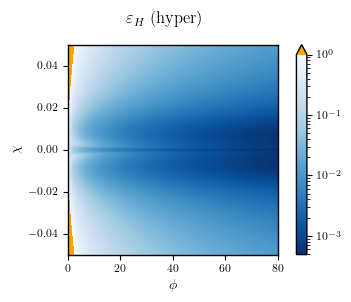

In [34]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(np.abs(epsilon_H)),
  extent = extent,
  cmap = sr_cmap,
  origin = 'lower',
  aspect = ratio,
  norm = "log",
  vmax=1
)

#show trajectory
# ax.plot(x, y, color='black')
# ax.scatter(
#   [x[0], x[-1]],
#   [y[0], y[-1]],
#   color='black'
# )

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image, extend='max')

#save
fig.suptitle(f'$\\varepsilon_H$ ({model})')
fig.show()
fig.savefig(f"./figs/{model}_epsilon_H_WITH_trajectory_log.pdf", dpi=500)

/tmp/ipykernel_119706/178705820.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


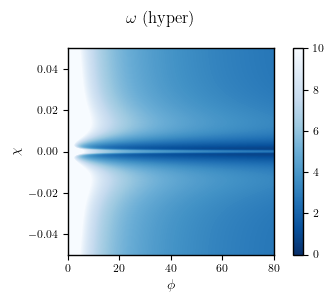

In [35]:
fig, ax = plt.subplots(figsize=(4,3))
image = ax.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= cc_cmap,
  origin= 'lower',
  aspect= ratio,
  vmax=10,
  vmin=0
)

# ax.plot(x, y, color='black')
# ax.scatter(
#   [x[0], x[-1]],
#   [y[0], y[-1]],
#   color='black'
# )

# # insert inset zoomed image
# x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
# zoom_extent = (x1, x2, y1, y2)
# idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
# idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

# zoom = omega[idx1:idx2, idy1:idy2]
# zoomax = ax.inset_axes(
#   [0.1, 0.25, 0.4, 0.4],
#   xlim=(x1, x2),
#   ylim=(y1, y2),
#   xticklabels=[],
#   yticklabels=[]
# )
# zoomax.imshow(np.transpose(zoom),
#   extent = zoom_extent,
#   aspect = ratio,
#   cmap = cc_cmap,
#   origin = 'lower',
#   vmax = 5,
#   vmin = 0
# )
# zoomax.plot(x, y, color='black', linestyle='dotted')
# ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image)

#save
fig.suptitle(f'$\\omega$ ({model})')
fig.show()
fig.savefig(f"./figs/{model}_omega.pdf", dpi=500)

/tmp/ipykernel_119706/2769277567.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


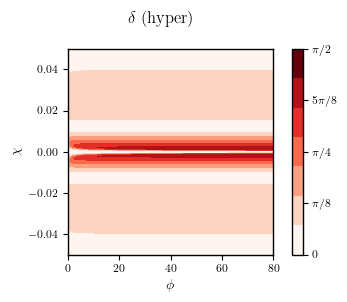

In [36]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(delta),
  extent = extent,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio,
  vmin=0,
  vmax=np.pi/2
)

# #show trajectory
# ax.plot(x, y, color='black')
# ax.scatter(
#   [x[0], x[-1]],
#   [y[0], y[-1]],
#   color='black'
# )

# # insert inset zoomed image
# x1, x2, y1, y2 = 25, 26, 8, 8.3  # subregion of the original image
# zoom_extent = (x1, x2, y1, y2)
# idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
# idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

# zoom = delta[idx1:idx2, idy1:idy2]
# zoomax = ax.inset_axes(
#   [0.05, 0.55, 0.4, 0.4],
#   xlim=(x1, x2),
#   ylim=(y1, y2),
#   xticklabels=[],
#   yticklabels=[]
# )
# zoomax.imshow(np.transpose(zoom),
#   extent = zoom_extent,
#   aspect = ratio,
#   cmap = delta_cmap,
#   origin = 'lower',
#   vmin=0,
#   vmax=np.pi/2
# )
# zoomax.plot(x, y, color='black', linestyle='dotted')
# zoomax.scatter([x[-1]], [y[-1]], color='black')
# ax.indicate_inset_zoom(zoomax, edgecolor="black")

#add a colorbar
cbar = fig.colorbar(image, ticks=[np.pi*n/8 for n in np.arange(0, 5)])
cbar.set_ticklabels(['$0$','$\\pi/8$', '$\\pi/4$','$5\\pi/8$','$\\pi/2$'])

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#save
fig.suptitle(f'$\\delta$ ({model})')
fig.show()
fig.savefig(f"./figs/{model}_delta.pdf", dpi=500)

# Sidetracked inflation

In [9]:
#load data
model='sidetrack'

potential = np.load(f"./out/{model}_potential.npy")
# consistency_old = np.load(f"./out/{model}_old.npy")

consistency = np.load(f"./out/{model}.npy")
epsilon_V = np.load(f"./out/{model}_epsilon_V.npy")
epsilon_H = np.load(f"./out/{model}_epsilon_H.npy")
eta_H = np.load(f"./out/{model}_eta_H.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")

# consistency_ot = np.load(f"./out/{model}_ot.npy")
# epsilon_V_ot = np.load(f"./out/{model}_ot_epsilon_V.npy")
# epsilon_H_ot = np.load(f"./out/{model}_ot_epsilon_H.npy")
# eta_H_ot = np.load(f"./out/{model}_ot_eta_H.npy")
# delta_ot = np.load(f"./out/{model}_ot_delta.npy")
# omega_ot = np.load(f"./out/{model}_ot_omega.npy")

# x, y = np.load("./trajectories/angular_phix.npy"), np.load("./trajectories/angular_phiy.npy")

Nx, Ny = consistency.shape
extent = (-5, 35, -1.5e-3, 1.5e-3)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

/tmp/ipykernel_45917/832384044.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


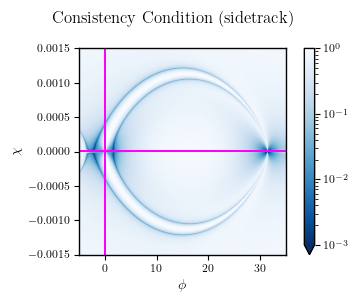

In [10]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(consistency),
  extent = extent,
  cmap = cc_cmap,
  norm = "log",
  origin = 'lower',
  aspect = ratio,
  vmax=1,
  vmin=1e-3
)

#show trajectory
# ax.plot(x, y, color='black')
# ax.scatter(
#   [x[0], x[-1]],
#   [y[0], y[-1]],
#   color='black'
# )

# insert inset zoomed image
# x1, x2, y1, y2 = 0.87, 0.91, 0.44, 0.48  # subregion of the original image
# zoom_extent = (x1, x2, y1, y2)
# idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
# idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

# zoom = consistency[idx1:idx2, idy1:idy2]
# zoomax = ax.inset_axes(
#   [0.5, 0.65, 0.3, 0.3],
#   xlim=(x1, x2),
#   ylim=(y1, y2),
#   xticklabels=[],
#   yticklabels=[]
# )
# zoomax.imshow(np.transpose(zoom),
#   extent = zoom_extent,
#   cmap = cc_cmap,
#   aspect = ratio,
#   norm = "log",
#   origin = 'lower',
#   # vmax=1,
#   vmin=1e-3
# )
# zoomax.plot(x, y, color='black', linestyle='dotted')
# ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image, extend='min')

fig.suptitle(f'Consistency Condition ({model})')

#save
fig.show()
fig.savefig(f"./figs/{model}_consistency_exact_log.pdf", dpi=500)

/tmp/ipykernel_45917/3534685616.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


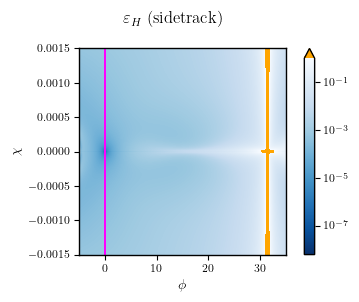

In [11]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(np.abs(epsilon_H)),
  extent = extent,
  cmap = sr_cmap,
  origin = 'lower',
  aspect = ratio,
  norm = "log",
  vmax=1
)

#show trajectory
# ax.plot(x, y, color='black')
# ax.scatter(
#   [x[0], x[-1]],
#   [y[0], y[-1]],
#   color='black'
# )

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image, extend='max')

#save
fig.suptitle(f'$\\varepsilon_H$ ({model})')
fig.show()
fig.savefig(f"./figs/{model}_epsilon_H_WITH_trajectory_log.pdf", dpi=500)

/tmp/ipykernel_45917/2694904305.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


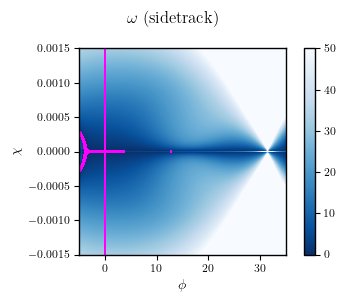

In [15]:
fig, ax = plt.subplots(figsize=(4,3))
image = ax.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= cc_cmap,
  origin= 'lower',
  aspect= ratio,
  vmax=50,
  vmin=0
)

# ax.plot(x, y, color='black')
# ax.scatter(
#   [x[0], x[-1]],
#   [y[0], y[-1]],
#   color='black'
# )

# # insert inset zoomed image
# x1, x2, y1, y2 = 0.484, 0.489, 2, 2.5  # subregion of the original image
# zoom_extent = (x1, x2, y1, y2)
# idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
# idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

# zoom = omega[idx1:idx2, idy1:idy2]
# zoomax = ax.inset_axes(
#   [0.1, 0.25, 0.4, 0.4],
#   xlim=(x1, x2),
#   ylim=(y1, y2),
#   xticklabels=[],
#   yticklabels=[]
# )
# zoomax.imshow(np.transpose(zoom),
#   extent = zoom_extent,
#   aspect = ratio,
#   cmap = cc_cmap,
#   origin = 'lower',
#   vmax = 5,
#   vmin = 0
# )
# zoomax.plot(x, y, color='black', linestyle='dotted')
# ax.indicate_inset_zoom(zoomax, edgecolor="black")

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#add a colorbar
fig.colorbar(image)

#save
fig.suptitle(f'$\\omega$ ({model})')
fig.show()
fig.savefig(f"./figs/{model}_omega.pdf", dpi=500)

/tmp/ipykernel_45917/2769277567.py:56: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


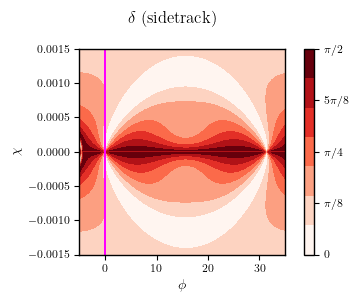

In [16]:
fig, ax = plt.subplots(figsize=(4,3))

#show consistency condition
image = ax.imshow(np.transpose(delta),
  extent = extent,
  cmap = delta_cmap,
  origin = 'lower',
  aspect = ratio,
  vmin=0,
  vmax=np.pi/2
)

# #show trajectory
# ax.plot(x, y, color='black')
# ax.scatter(
#   [x[0], x[-1]],
#   [y[0], y[-1]],
#   color='black'
# )

# # insert inset zoomed image
# x1, x2, y1, y2 = 25, 26, 8, 8.3  # subregion of the original image
# zoom_extent = (x1, x2, y1, y2)
# idx1, idx2 = round((x1 - extent[0]) * Nx / (extent[1] - extent[0])), round((x2 - extent[0]) * Nx / (extent[1] - extent[0]))
# idy1, idy2 = round((y1 - extent[2]) * Ny / (extent[3] - extent[2])), round((y2 - extent[2]) * Ny / (extent[3] - extent[2]))

# zoom = delta[idx1:idx2, idy1:idy2]
# zoomax = ax.inset_axes(
#   [0.05, 0.55, 0.4, 0.4],
#   xlim=(x1, x2),
#   ylim=(y1, y2),
#   xticklabels=[],
#   yticklabels=[]
# )
# zoomax.imshow(np.transpose(zoom),
#   extent = zoom_extent,
#   aspect = ratio,
#   cmap = delta_cmap,
#   origin = 'lower',
#   vmin=0,
#   vmax=np.pi/2
# )
# zoomax.plot(x, y, color='black', linestyle='dotted')
# zoomax.scatter([x[-1]], [y[-1]], color='black')
# ax.indicate_inset_zoom(zoomax, edgecolor="black")

#add a colorbar
cbar = fig.colorbar(image, ticks=[np.pi*n/8 for n in np.arange(0, 5)])
cbar.set_ticklabels(['$0$','$\\pi/8$', '$\\pi/4$','$5\\pi/8$','$\\pi/2$'])

ax.set_xlabel('$\\phi$')
ax.set_ylabel('$\\chi$')

#save
fig.suptitle(f'$\\delta$ ({model})')
fig.show()
fig.savefig(f"./figs/{model}_delta.pdf", dpi=500)